<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Статистический-анализ.-Проверка-гипотез" data-toc-modified-id="Статистический-анализ.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Статистический анализ. Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

<h1>Содержание<span class="tocSkip"></span></h1>

# Определение перспективного тарифа для телеком-компании

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 

2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 

2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Описание данных**

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файлов


In [3]:
import warnings
warnings.filterwarnings('ignore')#скрытие предупреждений

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [4]:
users = pd.read_csv('/datasets/users.csv')
display(users.head()) #вывод первых 5 строчек
users.info() # получение общей информации о данных в таблице 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица 'users' состотит из 8-и столбцов, названия в порядке. _Требуется обработка пропусков в 'churn_date'_. Столбец 'city' нужно проверить на наличие неявных дубликатов. Столбцы 'churn_date', 'reg_date' нужно привести к типу datetime.

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head()) #вывод первых 5 строчек
calls.info() # получение общей информации о данных в таблице 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet = pd.read_csv('/datasets/internet.csv')
display(internet.head()) #вывод первых 5 строчек
internet.info() # получение общей информации о данных в таблице 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица 'internet' состотит из 5-и столбцов, названия в порядке, пропущенных значений нет. Столбец 'Unnamed: 0' - так как данного столбца нет в описании данных, видмо это столбец, дублирующий индексы - нужно удалить.
Столбец session_date нужно привести к типу datetime.


In [7]:
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head()) #вывод первых 5 строчек
messages.info() # получение общей информации о данных в таблице 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица 'messages' состотит из 3-х столбцов, названия в порядке, пропущенных значений нет.
Столбец message_date нужно привести к типу datetime.

In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head()) #вывод первых 5 строчек
tariffs.info() # получение общей информации о данных в таблице 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица 'tariffs' состотит из 8-и столбцов, названия в порядке, пропущенных значений нет. Типы данных в порядке. Предобработка не требуется.

**Вывод:**

Итого у нас 5 датафреймов с информацией по тарифам "Смарт" и "Ультра".

Требуется привести данные к нужным типам, обработать пропуски и проверить на дубликаты. </font> 

## Предобработка данных

**Нужно сделать:**
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть. Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.


Обработаю **таблицу 'users'**. _Требуется обработка пропусков в 'churn_date'_ Столбец 'city' нужно проверить на наличие неявных дубликатов. Столбцы 'churn_date', 'reg_date' приведу к типу datetime.

In [9]:
# Приведу 'churn_date', 'reg_date' к типу datetime.
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [10]:
#display(sorted(users['city'].unique())) #вывожу список уникальных значений

In [11]:
display(users.head())
users.info() #Проверяю, если все в порядке, иду дальше

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В **таблице 'calls'** необходимо изменить типы данных: 
- call_date привести к типу datetime
- id к int
- duration к int с округлением вверх (так как оператор округляет все звонки)


В соответсвии с описанием, звонки с нулевой продолжительностью - это пропущенные звонки, поэтому их не нужно удалять.


In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [13]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


В **таблице 'internet'**  нужно:
- удалить столбец 'Unnamed: 0' (так как данного столбца нет в описании данных, видимо это столбец дублирующий индексы); 
- id к int
- столбец session_date нужно привести к типу datetime

In [14]:
internet.drop(columns = ['Unnamed: 0'],axis = 1)
internet['id'] = internet['id'].astype('int')
#internet['mb_used'] = internet['mb_used'].apply(math.ceil).astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

**Так как, согласно ТЗ, для веб-трафика отдельные сессии не считаются и вместо этого общая сумма за месяц округляется в бо́льшую сторону, пока не буду изменять тип mb_used, чтобы не потерять знаки после запятой.</font>**

In [15]:
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,112.95,2018-11-25,1000
1,1,10001,1052.81,2018-09-07,1000
2,2,10002,1197.26,2018-06-25,1000
3,3,10003,550.27,2018-08-22,1000
4,4,10004,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


В **таблица 'messages'**:
- id к int
- cтолбец message_date нужно привести к типу datetime.

In [16]:
messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [17]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


**Вывод:**

Была проведена предобработка данных в таблицах. Удален лишний столбец в таблице 'internet'. Значения в вещественных столбцах округлены "вверх", изменены типы данных на подходящие.

## Расчёты и добавление результатов в таблицу


**Посчитайте для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам**

In [18]:
calls['month'] = calls['call_date'].astype('datetime64[M]') #Добавлю столбец с номером месяца

In [19]:
#Сделаю сводную таблицу с подсчетом количества сделанных звонков и израсходованных минут разговора по месяцам
calls = calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls = calls.rename(columns={'id':'total_calls_in_month','duration':'calls_duration_in_month'})
display(calls.head())


,user_id,month,total_calls_in_month,calls_duration_in_month
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466


**Подсчет количества отправленных сообщений по месяцам**

In [20]:
messages['month'] = messages['message_date'].astype('datetime64[M]') #Добавлю столбец с номером месяца

In [21]:
#Сделаю сводную таблицу с подсчетом количества отправленных сообщений по месяцам
messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages = messages.rename(columns={'id':'total_messages_in_month'})
display(messages.head())

,user_id,month,total_messages_in_month
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


**Вычисление объема израсходованного интернет-трафика по месяцам**

In [22]:
internet['month'] = internet['session_date'].astype('datetime64[M]') #Добавлю столбец с номером месяца

In [23]:
#Сделаю сводную таблицу с вычислением объема израсходованного интернет-трафика по месяцам
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet= internet.rename(columns={'mb_used':'total_mb_in_month'})
display(internet.head())

,user_id,month,total_mb_in_month
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91


**Расчет помесячной выручки с каждого пользователя**

Для подсчёта выручки нужно объеденить сгруппированные таблицы (по звонкам, сообщениям и интернету), добавить название м условие тарифа.

In [24]:
#Создам новую таблицу, объединив таблицы по звонкам, сообщениям и интернету. Поочередно примененю метод merge к таблицам.
df = calls.merge(messages, on=['user_id', 'month'], how='outer')\
    .merge(internet, on=['user_id', 'month'], how='outer')

In [25]:
display(df.head()) #Проверяю, что получилось

,user_id,month,total_calls_in_month,calls_duration_in_month,total_messages_in_month,total_mb_in_month
0,1000,2018-05-01,22.0,159.0,22.0,2253.49
1,1000,2018-06-01,43.0,172.0,60.0,23233.77
2,1000,2018-07-01,47.0,340.0,75.0,14003.64
3,1000,2018-08-01,52.0,408.0,81.0,14055.93
4,1000,2018-09-01,58.0,466.0,57.0,14568.91


Далее добавлю к df столбцы таблицы 'users', а следом информацию по тарифам (через столбец 'tariff')

In [26]:
#Добавлю к общей таблице информацию о пользователях
df = df.merge(users, on='user_id', how='left')
display(df.head()) #Проверяю, что получилось

,user_id,month,total_calls_in_month,calls_duration_in_month,total_messages_in_month,total_mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [27]:
display(tariffs) #Проверю названия столбцов

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
#Заменю название tariff_name на tariff, для дальнейшего объединения таблиц
tariffs = tariffs.rename(columns={'tariff_name':'tariff'}) 

In [29]:
#Прикреплю к общей таблице информацию о тарифах, через столбец tariff
df = df.merge(tariffs, on='tariff', how='left')
display(df.head())

,user_id,month,total_calls_in_month,calls_duration_in_month,total_messages_in_month,total_mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [30]:
#Для удобства дальнейших расчетов, переведу мб в гб 
#Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону
df['total_mb_in_month'] = (df['total_mb_in_month'] / 1024).apply(np.ceil) #округляю в большую сторону 
df['mb_per_month_included'] = df['mb_per_month_included'] /1024
df = df.rename(columns={'total_mb_in_month':'total_gb_in_month',\
                        'mb_per_month_included':'gb_per_month_included'})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                    3214 non-null int64
month                      3214 non-null datetime64[ns]
total_calls_in_month       3174 non-null float64
calls_duration_in_month    3174 non-null float64
total_messages_in_month    2717 non-null float64
total_gb_in_month          3203 non-null float64
age                        3214 non-null int64
churn_date                 187 non-null datetime64[ns]
city                       3214 non-null object
first_name                 3214 non-null object
last_name                  3214 non-null object
reg_date                   3214 non-null datetime64[ns]
tariff                     3214 non-null object
messages_included          3214 non-null int64
gb_per_month_included      3214 non-null float64
minutes_included           3214 non-null int64
rub_monthly_fee            3214 non-null int64
rub_per_gb                 3214 non-null int64
rub_per

In [32]:
df.isna().sum() #Проверю пропуски

user_id                       0
month                         0
total_calls_in_month         40
calls_duration_in_month      40
total_messages_in_month     497
total_gb_in_month            11
age                           0
churn_date                 3027
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
messages_included             0
gb_per_month_included         0
minutes_included              0
rub_monthly_fee               0
rub_per_gb                    0
rub_per_message               0
rub_per_minute                0
dtype: int64

Пропуски для столбцов с подсчетами по месяцам логично заменить на 0 (это пользователи, которые не использовали звонки, смс, интернет). Пропуски для 'churn_date' оставляю, так как это дата прекращения пользования тарифом (т.е. если значение пропущено, то тариф ещё действовал на момент выгрузки данных).


In [33]:
df['total_calls_in_month'] = df['total_calls_in_month'].fillna(0)
df['calls_duration_in_month'] = df['calls_duration_in_month'].fillna(0)
df['total_messages_in_month'] = df['total_messages_in_month'].fillna(0)
df['total_gb_in_month'] = df['total_gb_in_month'].fillna(0)
df.isna().sum() 

user_id                       0
month                         0
total_calls_in_month          0
calls_duration_in_month       0
total_messages_in_month       0
total_gb_in_month             0
age                           0
churn_date                 3027
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
messages_included             0
gb_per_month_included         0
minutes_included              0
rub_monthly_fee               0
rub_per_gb                    0
rub_per_message               0
rub_per_minute                0
dtype: int64

In [34]:
df.duplicated().sum() #проверю на дубликаты

0

С данными все в порядке - пропуски заполнены, дубликатов нет.

Приступлю непосредственно к расчету помесячной выручки с каждого пользователя. Вычту бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножу на значение из тарифного плана; прибавлю абонентскую плату, соответствующую тарифному плану.

In [35]:
#Функция для посчета выручки 
def revenue(row):
    monthly_fee = row['rub_monthly_fee']
    
    minutes = (row['calls_duration_in_month'] - row['minutes_included']) * row['rub_per_minute']
    messages = (row['total_messages_in_month'] - row['messages_included']) * row['rub_per_message']
    gb = (row['total_gb_in_month'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for i in [minutes, messages, gb]:
        if i > 0:
            total += i
    revenue_per_user =  monthly_fee + total     
    return revenue_per_user

In [36]:
df['revenue'] = df.apply(revenue, axis=1)
display(df.sort_values(by='revenue')) #для наглядности отсортирую таблицу и посмотрю на первые и последние строчки 

,user_id,month,total_calls_in_month,calls_duration_in_month,total_messages_in_month,total_gb_in_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
2127,1340,2018-01-01,5.0,25.0,0.0,3.0,50,NaT,Пенза,Тимофей,...,2018-01-30,smart,50,15.0,500,550,200,3,3,550.0
2982,1468,2018-11-01,36.0,276.0,13.0,13.0,29,NaT,Тамбов,Иван,...,2018-02-11,smart,50,15.0,500,550,200,3,3,550.0
2318,1373,2018-01-01,2.0,0.0,28.0,9.0,34,NaT,Улан-Удэ,Нелли,...,2018-01-17,smart,50,15.0,500,550,200,3,3,550.0
829,1134,2018-02-01,59.0,458.0,47.0,13.0,65,NaT,Красноярск,Марьяна,...,2018-01-16,smart,50,15.0,500,550,200,3,3,550.0
1721,1275,2018-12-01,61.0,364.0,17.0,15.0,48,NaT,Москва,Семён,...,2018-04-24,smart,50,15.0,500,550,200,3,3,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,1286,2018-12-01,95.0,739.0,68.0,35.0,19,NaT,Москва,Рашид,...,2018-11-27,smart,50,15.0,500,550,200,3,3,5321.0
1622,1261,2018-12-01,141.0,1074.0,22.0,32.0,46,NaT,Казань,Мадина,...,2018-10-30,smart,50,15.0,500,550,200,3,3,5672.0
3105,1486,2018-11-01,108.0,764.0,96.0,36.0,35,NaT,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15.0,500,550,200,3,3,5680.0
260,1042,2018-12-01,121.0,728.0,75.0,37.0,42,NaT,Хабаровск,Константин,...,2018-11-25,smart,50,15.0,500,550,200,3,3,5709.0


Помесячная выручка с каждого пользователя получена.

__Вывод:__

Были расчитаны следующие показатели:
- Количество сделанных звонков и израсходованных минут разговора по месяцам;
- Количество отправленных сообщений по месяцам;
- Объем израсходованного интернет-трафика по месяцам;


- Для подсчёта выручки были объеденены сгруппированные таблицы (по звонкам, сообщениям и интернету), добавлены названия и условия тарифов.
- Расчитана помесячная выручка с каждого пользователя.

## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

Проанализирую выручку по тарифам.

Для визуальной оценки разброса значений построю диаграмму размаха, оценю числовые характеристики. Чтобы визуально оценить как часто в наборе данных встречается то или иное значение - построю гистограммы. 

In [37]:
df['revenue'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [38]:
df

,user_id,month,total_calls_in_month,calls_duration_in_month,total_messages_in_month,total_gb_in_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-09-01,0.0,0.0,32.0,17.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,950.0
3210,1489,2018-10-01,0.0,0.0,21.0,20.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1550.0
3211,1489,2018-11-01,0.0,0.0,20.0,18.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1150.0
3212,1489,2018-12-01,0.0,0.0,35.0,17.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,950.0


Text(0.5, 1.0, 'Диапазон выручки за месяц по тарифам.')

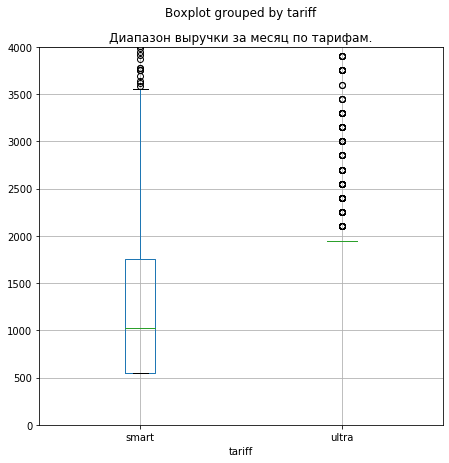

In [39]:
df.boxplot('revenue', by='tariff', figsize=(7,7)).set_ylim(0,4000)
plt.title('Диапазон выручки за месяц по тарифам.')

Диаграммы размаха заметно отличаются для тарифов "Смарт" и "Ультра". Пользователи тарифа "Смарт" часто выходят за рамки тарифа. Медианное значение для выручки с тарифа "Смарт" порядка 1050 рублей. 

Диаграмма размаха для тарифа "Ультра" выглядит как медиана на уровне 1950 рублей(ежемесяная плата) с выбросами с приблизительно равными интервалами. Т.е. Большинство укладывается в рамки тарифа.

In [40]:
df.groupby('tariff')\
  .agg({'revenue':['median','mean','var','std', 'count', 'sum']})\
  .style.format("{:.0f}")

Средние значения выручки для тарифа "Ультра" больше, однако СКО значительно ниже чем у тарифа "Смарт". Т.е. пользователи тарифа "Смарт" чаще выходят за пределы тарифа и докупают дополнительный трафик/смс/минуты.

In [41]:
#Построю гистгораммы распределния выручки по тарифам
#plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
#df[df['tariff'] == 'smart']['revenue'].plot(kind='hist', bins=20)
#plt.title('Тариф "Смарт". Выручка за месяц')
#plt.subplot(2,2,2)
#df[df['tariff'] == 'ultra']['revenue'].plot(kind='hist', bins=20)
#plt.title('Тариф "Ультра". Выручка за месяц')
#plt.show()

Text(0.5, 1.0, 'Выручка за месяц по тарифам')

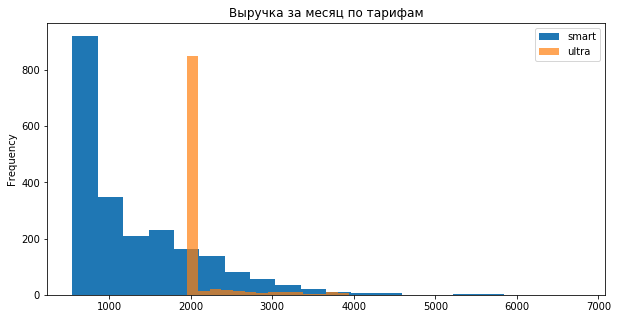

In [42]:
#Построю гистгорамму распределния выручки для обоих тарифов на одном графике
plt.figure(figsize=(10,5))
df[df['tariff'] == 'smart']['revenue'].plot(kind='hist', bins=20, label = 'smart')
df[df['tariff'] == 'ultra']['revenue'].plot(kind='hist', bins=20, alpha=0.7, label = 'ultra')
plt.legend()
plt.title('Выручка за месяц по тарифам')


По гистограммам хорошо видно, что выручка за месяц по тарифу "Смарт" с одного пользователя часто привышает стоимость тарифа, а для тарифа "Ультра" редко привышает стоимость тарифа.


Гистаграммы выручки за месяц далеки от нормлаьного распределения (как и большинство реальных бизнес-метрик). Могу для дополнительной оценки использовать график Q-Q plot, чтобы оценить степень отклонения данных от теоретического распределения.

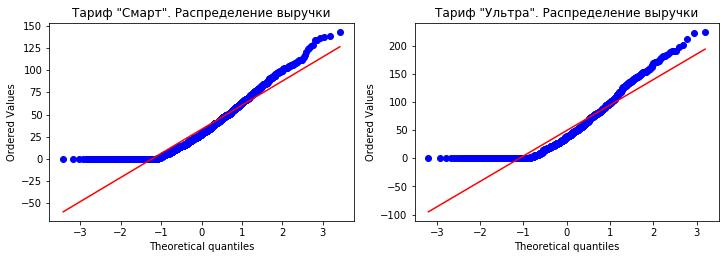

In [43]:
#Строю графики Q-Q plot для выручки
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df[df['tariff'] == 'smart']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Смарт". Распределение выручки')
plt.subplot(2,2,2)
st.probplot(df[df['tariff'] == 'ultra']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Ультра". Распределение выручки')
plt.show()

По графикам видно, что начиная от 0 значения выборки стремятся к нормлаьному распределению.



Изучив выручку за месяц по обоим тарифам, можно сделать вывод, что пользователи тарифа "Смарт" привыкли платить сверх тарифа, пользователи тарифа "Ультра" редко выходят за пределы тарифа. Средняя выручка с пользователя "Смарт" составляет 1233 руб., с "Ультра" - 2061 руб. Количество пользователей тарифа "Смарт" привышает количество пользоватлей "Ультра" более чем в два раза, поэтому в общем объеме выручка с тарифа "Смарт" выше  чем с тарифа "Ультра".

Теперь проанализирую сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Так же посчитаю среднее количество, дисперсию и стандартное отклонение.

In [44]:
#Оценю числовые характеристики по продолжительности звонков
df.groupby('tariff')\
  .agg({'calls_duration_in_month':['median','mean','var','std']})\
  .style.format("{:.0f}")

In [45]:
#Строю гистограммы для продолжительности звонков
#plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
#df[df['tariff'] == 'smart']['calls_duration_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Смарт". Звонки в минутах в месяц')
#plt.subplot(2,2,2)
#df[df['tariff'] == 'ultra']['calls_duration_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Ультра". Звонки в минутах в месяц')
#plt.show()

Text(0.5, 1.0, 'Звонки в минутах в месяц по тарифам')

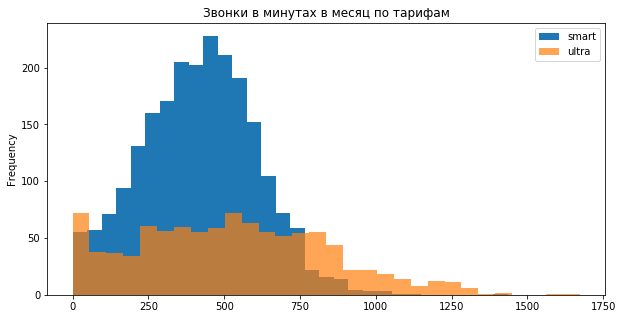

In [46]:
#Построю гистгорамму распределния продолжительности звонков для обоих тарифов на одном графике
plt.figure(figsize=(10,5))
df[df['tariff'] == 'smart']['calls_duration_in_month'].plot(kind='hist', bins=30, label = 'smart')
df[df['tariff'] == 'ultra']['calls_duration_in_month'].plot(kind='hist', bins=30, alpha=0.7, label = 'ultra')
plt.legend()
plt.title('Звонки в минутах в месяц по тарифам')


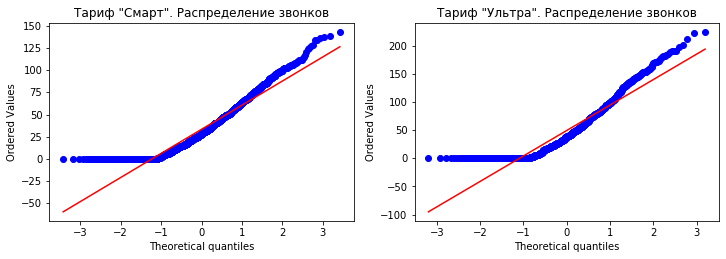

In [47]:
#Строю графики Q-Q plot для продолжительности звонков
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df[df['tariff'] == 'smart']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Смарт". Распределение звонков')
plt.subplot(2,2,2)
st.probplot(df[df['tariff'] == 'ultra']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Ультра". Распределение звонков')
plt.show()


Пользователи тарифов отличаются по количеству использованных минут разговора за месяц: 
- Пользователи тарифа "Смарт" в среднем тратят около 420 минут (т.е. обычно не выходят за пределы тарифа(500 мин)), но есть и те, кому тарифного времени не хватает. 
- Пользователи тарифа "Ультра" тратят больше, в среднем около 530 минут. Никто из пользователей тарифа "Ультра" не израсходовал лимит в 3000 минут.

Пользователи тарифа "Ультра" разговаривают по телефону больше, СКО для этого тарифа выше чем для тарифа "Смарт"- т.е. больше людей, кто тратит минут больше среднего.

In [48]:
#Оценю числовые характеристики по колличеству смс
df.groupby('tariff')\
  .agg({'total_messages_in_month':['median','mean','var','std']})\
  .style.format("{:.0f}")

In [49]:
#Строю гистограммы для колличества смс
#plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
#df[df['tariff'] == 'smart']['total_messages_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Смарт". Количество смс в месяц')
#plt.subplot(2,2,2)
#df[df['tariff'] == 'ultra']['total_messages_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Ультра". Количество смс в месяц')
#plt.show()

Text(0.5, 1.0, 'Колличество смс в месяц по тарифам')

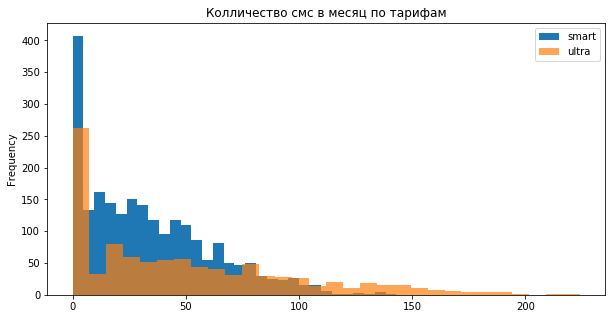

In [50]:
#Построю гистгорамму распределния колличества смс для обоих тарифов на одном графике
plt.figure(figsize=(10,5))
df[df['tariff'] == 'smart']['total_messages_in_month'].plot(kind='hist', bins=30, label = 'smart')
df[df['tariff'] == 'ultra']['total_messages_in_month'].plot(kind='hist', bins=30, alpha=0.7, label = 'ultra')
plt.legend()
plt.title('Колличество смс в месяц по тарифам')

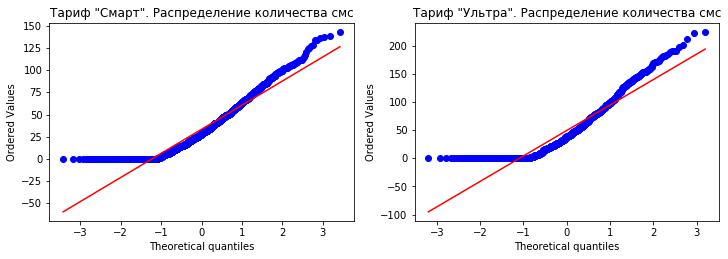

In [51]:
#Строю графики Q-Q plot для колличества смс
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df[df['tariff'] == 'smart']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Смарт". Распределение количества смс')
plt.subplot(2,2,2)
st.probplot(df[df['tariff'] == 'ultra']['total_messages_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Ультра". Распределение количества смс')
plt.show()



Для обоих тарифов количество потраченных смс нечасто достигает 50. Т.е. в основной массе люди редко пишут смс. Небольшая часть пользователи тарифа "Смарт" выходит за предел тарифа по смс, пользователи тарифа "Ультра" - никогда, но все же тратят сообщений больше, чем пользователи "Смарт".

In [52]:
#Оценю числовые характеристики по интернет-трафику
df.groupby('tariff')\
  .agg({'total_gb_in_month' :['median','mean','var','std']})\
  .style.format("{:.0f}")

In [53]:
#Строю гистограммы для интернет-трафика
#plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
#df[df['tariff'] == 'smart']['total_gb_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Смарт". Кол-во потраченного интернет-трафика')
#plt.subplot(2,2,2)
#df[df['tariff'] == 'ultra']['total_gb_in_month'].plot(kind='hist', bins=10)
#plt.title('Тариф "Ультра". Кол-во потраченного интернет-трафика')
#plt.show()

Text(0.5, 1.0, 'Кол-во потраченного интернет-трафика по тарифам')

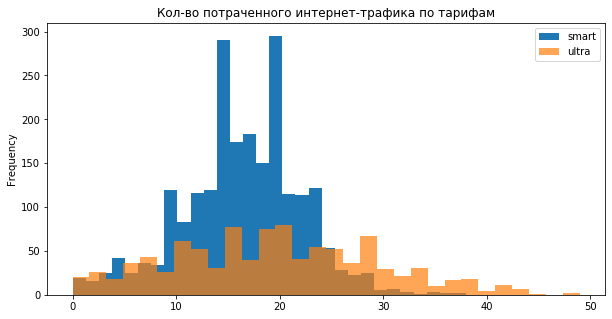

In [54]:
#Построю гистгорамму распределния колличества потраченного интернет-трафика для обоих тарифов на одном графике
plt.figure(figsize=(10,5))
df[df['tariff'] == 'smart']['total_gb_in_month'].plot(kind='hist', bins=30, label = 'smart')
df[df['tariff'] == 'ultra']['total_gb_in_month'].plot(kind='hist', bins=30, alpha=0.7, label = 'ultra')
plt.legend()
plt.title('Кол-во потраченного интернет-трафика по тарифам')

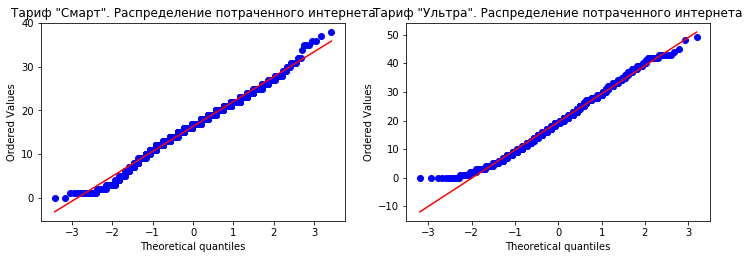

In [55]:
#Строю графики Q-Q plot для интернет-трафика
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df[df['tariff'] == 'smart']['total_gb_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Смарт". Распределение потраченного интернета')
plt.subplot(2,2,2)
st.probplot(df[df['tariff'] == 'ultra']['total_gb_in_month'], dist="norm", plot=plt)
plt.title('Тариф "Ультра". Распределение потраченного интернета')
plt.show()



- Пользователи тарифа "Смарт" в среднем тратят 16гб интернета, т.е. выходят за пределы тарифа (тарифом предусмотрено 15 гб). 
- Пользователи тарифа "Ультра" в среднем тратят 19гб интернета, но есть часть людей, кто тратит больше 30гб и выходит за пределы тарифа.

Распределение выборки интернет-трафика тарифа "Смарт" больше всего похоже на нормальное. В выборке есть люди, кто почти не пользуется интернетом и те, кто пользуется много. 


__Вывод:__

* Изучив выручку за месяц по обоим тарифам, можно сделать вывод, что пользователи тарифа "Смарт" привыкли платить сверх тарифа, пользователи тарифа "Ультра" редко выходят за пределы тарифа. Средняя выручка с пользователя "Смарт" составляет 1233 руб., с "Ультра" - 2061 руб. Количество пользователей тарифа "Смарт" привышает количество пользоватлей "Ультра" более чем в два раза, поэтому в общем объеме выручка с тарифа "Смарт" выше  чем с тарифа "Ультра".


* Пользователи тарифа "Ультра" разговаривают по телефону больше, среди них также больше людей, кто тратит минут больше среднего.

  - Пользователи тарифа "Смарт" в среднем тратят около 420 минут (т.е. обычно не выходят за пределы тарифа(500 мин)), но есть и те, кому тарифного времени не хватает. 
  - Пользователи тарифа "Ультра" тратят больше, в среднем около 530 минут. Никто из пользователей тарифа "Ультра" не израсходовал лимит в 3000 минут.


* Для обоих тарифов количество потраченных смс нечасто достигает 50. Т.е. в основной массе люди редко пишут смс. Небольшая часть пользователи тарифа "Смарт" выходит за предел тарифа по смс, пользователи тарифа "Ультра" - никогда, но все же тратят сообщений больше, чем пользователи "Смарт".


* Пользователи тарифа "Смарт" в среднем тратят 16гб интернета, т.е. выходят за пределы тарифа (тарифом предусмотрено 15 гб). Пользователи тарифа "Ультра" в среднем тратят 19гб интернета, но есть часть людей, кто тратит больше 30гб и выходит за пределы тарифа.


## Статистический анализ. Проверка гипотез

Проверю следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задам самостоятельно.

Согласно Центральной предельной теореме сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы имеет распределение, близкое к нормальному. Поэтому для проверки гипотиз могу использовать t-критерий Стьюдента (сравниваемые выборки независимы между собой).



In [56]:
smart = df.query('tariff == "smart"') #выборка по тарифу "Смарт"
ultra = df.query('tariff == "ultra"') #выборка по тарифу "Ультра"

moscow = df.query('city == "Москва"') #выборка по Москве
another_city = df.query('city != "Москва"') #выборка по другим городам


__Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.__

Сформулирую нулевую и альтернативную гипотизы:
- H0: Средние выручки тарифов «Ультра» и «Смарт» одинаковы
- H1: Средние выручки тарифов «Ультра» и «Смарт» различаются

Уровень значимости: alpha = 0.05

Посчитаю p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости alpha = 0.05, то нулевую гипотезу оравенстве средних отвергну. В противном случае, сделаю вывод, что данные не позволили отвергнуть нулевую гипотезу.

In [57]:
#Применю ttest к выручкам с тарифов "Ультра" и "Смарт"
alpha = .05

results = st.ttest_ind(
    smart['revenue'],
    ultra['revenue'], equal_var = False) #значение False, т.к. выборки разного размера.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


__Вывод:__
p-value получилось меньше выбранного уровня значимости (alpha = 0.05). Отвергаем нулевую гипотезу. Средние выручки тарифов «Ультра» и «Смарт» различаются.


__Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.__

Сформулирую нулевую и альтернативную гипотизы:
- H0: Средние выручки пользователей из Москвы и других регионов одинаковы
- H1: Средние выручки пользователей из Москвы и других регионов различаются

Уровень значимости: alpha = 0.05

Посчитаю p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости alpha = 0.05, то нулевую гипотезу оравенстве средних отвергну. В противном случае, сделаю вывод, что данные не позволили отвергнуть нулевую гипотезу.

In [58]:
#Применю ttest к выручкам пользователей из Москвы и других регионов
alpha = .05

results = st.ttest_ind(
    moscow['revenue'],
    another_city['revenue'], equal_var = False) #значение False, т.к. выборки разного размера.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


__Вывод:__
p-value получилось больше выбранного уровня значимости (alpha = 0.05). Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы и других регионов не различаются при выбраном уровне статистической значимости.


**Вывод**

Был проведен статистический анализ показателей выручки.  

С помощью t-критерия Стьюдента были проверены гипотезы: 
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Статистическая проверка гипотез показала, что:
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- Средняя выручка пользователей из Москвы и других регионов не различается при выбраном уровне статистической значимости.


## Общий вывод

Данное исследование было подготовлено для коммерческого департамента компании «Мегалайн» — федерального оператора сотовой связи.Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

- Были проанализированы выручка по тарифам, а так же их основные характеристики (количество используемых минут, смс, интернет-трафика:

    1. Пользователи тарифов различаются в своем поведении. Пользователи тарифа "Ультра" больше разговаривают по телефону, пишут смс и тратят интернет-трафика.

    2. Пользователи тарифа "Смарт" привыкли платить сверх тарифа, пользователи тарифа "Ультра" редко выходят за его пределы. Средняя выручка с пользователя "Смарт" составляет 1233 руб., с "Ультра" - 2061 руб. Количество пользователей тарифа "Смарт" привышает количество пользоватлей "Ультра" более чем в два раза, поэтому в общем объеме выручка с тарифа "Смарт" выше чем с тарифа "Ультра".

    3. Пользователи тарифа "Ультра" разговаривают по телефону больше, среди них также больше людей, кто тратит минут больше среднего. Пользователи тарифа "Смарт" в среднем тратят около 420 минут (т.е. обычно не выходят за пределы тарифа(500 мин)), но есть и те, кому тарифного времени не хватает. Пользователи тарифа "Ультра" тратят больше, в среднем около 530 минут. Никто из пользователей тарифа "Ультра" не израсходовал лимит в 3000 минут.

    4. Для обоих тарифов количество потраченных смс нечасто достигает 50. Т.е. в основной массе люди редко пишут смс. 

    5. Пользователи тарифа "Смарт" в среднем тратят 16гб интернета, т.е. выходят за пределы тарифа (тарифом предусмотрено 15 гб). Пользователи тарифа "Ультра" в среднем тратят 19гб интернета, но есть часть людей, кто тратит больше 30гб и выходит за пределы тарифа.


- Статистический анализ показателей выручки показал, что:
    1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    2. Средняя выручка пользователей из Москвы и других регионов не различается.


Тариф "Ультра" - это некий безлимит, один раз в месяц заплатил и всегда на связи. Тариф "Смарт" на первый взгляд кажется более экономичным, но по факту требует постоянных дополнительных платежей, увеличивающих изначальную цену тарифа более чем в 2 раза. По большей части это происходит из-за нехватки гб интернет-трафика. __Такая постоянная необходимость платить сверх тарифа может привести к оттоку клиентов тарифа "Смарт".__

Поэтому, целесообразно доработать тарифы, возможно добавить смежный тариф "Ультра Лайт" со стоимостью немного выше средней выручки тарифа "Смарт" с бОльшим запасом интернет-трафика и минут разговора. Это позволит просегментировать пользователей и повысить их удовлетвореность, при этом увеличив выручку.
Так как средняя выручка пользователей из Москвы и других регионов не различается, не требуется дополнительных изменений тарифов для регионов. 
